# Classification_Iris

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
li=load_iris()

In [3]:
df=pd.DataFrame(li.data,columns=li.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<img src= iris-machinelearning.png style= width:650px>

In [4]:
X=li.data
y=li.target

X.shape   ,       y.shape

((150, 4), (150,))

In [8]:
df['class']=li.target

In [9]:
df['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [7]:
df['class'].unique()

array([0, 1, 2])

In [13]:
li.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
li.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
li.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
li.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

***

# Missing Values:

In [11]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

***

### Using only one feature for visualization:

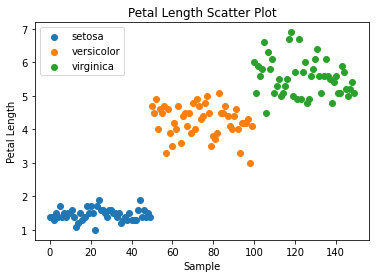

In [14]:
plt.scatter(df.loc[df['class']==0,'petal length (cm)'].index, df.loc[df['class']==0,'petal length (cm)'], label= 'setosa')
plt.scatter(df.loc[df['class']==1,'petal length (cm)'].index, df.loc[df['class']==1,'petal length (cm)'], label= 'versicolor')
plt.scatter(df.loc[df['class']==2,'petal length (cm)'].index, df.loc[df['class']==2,'petal length (cm)'], label= 'virginica')
plt.xlabel('Sample') 
plt.ylabel('Petal Length')
plt.title('Petal Length Scatter Plot')
plt.legend()
plt.legend()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [16]:
X_train.shape        , X_test.shape     ,                y_train.shape      , y_test.shape

((105, 4), (45, 4), (105,), (45,))

### Classification Model:

In [17]:
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression()

In [18]:
logR.fit(X_train,y_train)

LogisticRegression()

In [19]:
predicted=logR.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Multiclass classsification:

In [21]:
confusion_matrix(y_test,predicted)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [23]:
accuracy_score(y_test,predicted)

1.0

In [24]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



***
The **recall** means "how many of this class you find over the whole number of element of this class"

The **precision** will be "how many are correctly classified among that class"

The **f1-score** is the harmonic mean between precision & recall

The **support** is the number of occurence of the given class in your dataset (so you have 37.5K of class 0 and 37.5K of class 1, which is a really well balanced dataset

In [76]:
pd.DataFrame({'Actual':y_test, 'Predicted':predicted})

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


### PCA:

In [25]:
from sklearn.decomposition import PCA
sklearn_pca= PCA(n_components=.95) 

In [26]:
print(X_train.shape)

sklearn_pca.fit(X_train)
X_train_transformed = sklearn_pca.transform (X_train)
print(X_train_transformed.shape)

print(X_test.shape)

X_test_transformed=sklearn_pca.transform (X_test)
print(X_test_transformed.shape)

(105, 4)
(105, 2)
(45, 4)
(45, 2)


In [27]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression ()
lr.fit(X_train_transformed,y_train)
y_predict_pca= lr.predict (X_test_transformed)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score (y_predict_pca,y_test)
print(accuracy)

1.0
